In [2]:
def hint(string):
    return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ 

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答：
1. 文章类标题
2. 论文摘要
3. 电影预告片
4. 商品评论摘要

In [5]:
#hint('a.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')

Q2. 目前的摘要技术分为哪两类？

回答：
1. 说明性摘要：一般用于综述性文章。
2. 资料性摘要：提现原文的具体内容。

In [7]:
#hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')

Q3. 目前实现自动摘要的难点在哪里？列出三点。

回答：
1. 段落太长有可能会导致段落信息记忆的损失；
2. 缺乏标注训练数据；
3. 缺乏摘要评估指标。

In [9]:
#hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')

## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： 
 - PageRank: https://wizardforcel.gitbooks.io/dm-algo-top10/content/pagerank.html, Google专有的算法，用于衡量特定网页相对于搜索引擎索引中的其他网页而言的重要程度。PageRank实现了将链接价值概念作为排名因素。
 - 公式：$$ PR(p_i) = \frac{1-d}{N} + d \sum_{p_j \in M(p_i)} \frac{PR (p_j)}{L(p_j)} $$

In [4]:
#hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')

Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：
- 关系：TextRank是PageRank算法的变种，由PageRank算法改进过来的，用于文本关键字关键句的提取
- 背景原理：（结合论文及链接https://www.zybuluo.com/evilking/note/902585）

In [5]:
hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')


参考论文： https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf



Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

- Seq2Seq: 输入一个序列，输出也是一个序列，本质其实就是个Encoder-Decoder结构的网络。在Encoder中，将序列转换成一个固定长度的向量，然后通过Decoder将该向量转换成序列输出。
- Attention机制：训练一个模型对输入进行选择性学习并在模型输出时将输出序列与之进行关联。
- 参考内容：https://zhuanlan.zhihu.com/p/28054589

### Extractive, Abstractive 
+ Extractive是从文中找出关键信息，然后拼接进行结果输出
    + 确定重要信息
+ Abstracrtive: 依据文本的输入，生产单词（可能是新的单词）进行结果输出
    + Seq2Seq的问题
    + Transfomer

## Data Pipeline

In [1]:
import pandas as pd
import numpy as np
import jieba
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
import networkx
import random
import re

from gensim.models import FastText
from gensim.models.word2vec import LineSentence
from functools import reduce
from collections import Counter
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def transform(string):
    sentence = re.split(r'[.。?？!！]', string)
    pure_sentence = [re.sub(r'[^0-9A-Za-z\u4e00-\u9fa5]', '', i) for i in sentence]
    cut_sentence = ''.join(sent for sent in pure_sentence)
    return ' '.join(jieba.cut(cut_sentence))

In [74]:
# test another transform
def transform_2(data):
    a = split_sentence(data)
    b = get_sentence_list(a)
    return b

In [91]:
transform_2(df['content'][0])

[['此外',
  '自',
  '本周',
  '6',
  '月',
  '12',
  '日起',
  '除',
  '小米',
  '手机',
  '6',
  '等',
  '15',
  '款',
  '机型',
  '外',
  '其余',
  '机型',
  '已',
  '暂停',
  '更新',
  '发布',
  '含',
  '开发',
  '版',
  '体验版',
  '内测',
  '稳定版',
  '暂不受',
  '影响',
  '以',
  '确保',
  '工程师',
  '可以',
  '集中',
  '全部',
  '精力',
  '进行',
  '系统优化',
  '工作'],
 ['有人', '猜测', '这', '也', '是', '将', '精力', '主要', '用到', 'MIUI9', '的', '研发', '之中'],
 ['MIUI8',
  '去年',
  '5',
  '月',
  '发布',
  '距今已有',
  '一年',
  '有余',
  '也',
  '是',
  '时候',
  '更新换代',
  '了'],
 ['当然', '关于', 'MIUI9', '的', '确切', '信息', '我们', '还是', '等待', '官方消息']]

In [76]:
def split_sentence(string):
    str1 = string.replace('\r\n', '').strip()
    #str2 = str1.strip()
    sentence = re.split(r'[.。?？!！]', str1)
    pure_sentence = [i for i in sentence if i]
    return pure_sentence

In [83]:
def cut_sentence_to_words(sentence):
    '''
    words = []
    sentence = re.sub(r'[^0-9A-Za-z\u4e00-\u9fa5]', '', sentence)
    cut = jieba.cut(sentence)
    for w in cut:
        words.append(w)
    return words
    '''
    sentence = re.sub(r'[^0-9A-Za-z\u4e00-\u9fa5]', '', sentence)
    return [w for w in jieba.cut(sentence)]

In [90]:
def get_sentence_list(sentences):
    sentence_list = []
    for sent in sentences:
        words = cut_sentence_to_words(sent)
        if len(words) > 0:
            sentence_list.append(words)
    return sentence_list

In [6]:
fpath = r'D:\GitHub\Data\sqlResult_1558435.csv'

In [7]:
news_content = pd.read_csv(fpath, encoding='gb18030')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [48]:
df = pd.DataFrame()

In [49]:
df['content'] = news_content['content']

In [55]:
df = df.fillna('')

In [51]:
df['content'][0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [78]:
split_sentence(df['content'][0])

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI 9的研发之中',
 'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了',
 '当然，关于MIUI 9的确切信息，我们还是等待官方消息']

In [84]:
cut_sentence_to_words(split_sentence(df['content'][0])[0])

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作']

In [14]:
transform(df['content'][0])

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [92]:
df['tokenized_content'] = df['content'].apply(transform_2)

In [96]:
df['tokenized_content'][201]

[['环球网',
  '综合',
  '报道',
  '据',
  '美联社',
  '6',
  '月',
  '19',
  '日',
  '报道',
  '朝鲜',
  '18',
  '日',
  '控诉',
  '美国',
  '日前',
  '在',
  '纽约',
  '抢劫',
  '赴',
  '联合国',
  '参加',
  '会议',
  '的',
  '朝鲜',
  '外交',
  '代表团',
  '要求',
  '美方',
  '就',
  '此次',
  '事件',
  '向',
  '朝方',
  '做出',
  '解释',
  '并',
  '道歉'],
 ['美国', '国土', '安全部', '发言人', '大卫'],
 ['拉',
  '潘',
  '18',
  '日',
  '对',
  '朝方',
  '的',
  '指控',
  '作出',
  '回应',
  '称',
  '三名',
  '涉事',
  '朝鲜',
  '公民',
  '并非',
  '驻',
  '联合国',
  '代表团',
  '成员',
  '三人',
  '携带',
  '的',
  '文件',
  '和',
  '包裹',
  '不',
  '受',
  '外交',
  '豁免权',
  '保护',
  '必须',
  '接受',
  '检查'],
 ['报道',
  '称',
  '朝鲜外务省',
  '发言人',
  '18',
  '日',
  '表示',
  '出席',
  '在',
  '纽约',
  '举行',
  '的',
  '残疾人',
  '权利',
  '公约',
  '缔约国',
  '大会',
  '的',
  '朝鲜',
  '代表团',
  '16',
  '日',
  '在',
  '回国',
  '途中',
  '在',
  '纽约',
  '肯尼迪',
  '机场',
  '遭到',
  '抢劫'],
 ['在',
  '该',
  '机场',
  '自称',
  '是',
  '美国',
  '国土',
  '安全部',
  '人员',
  '和',
  '警察',
  '等',
  '20',
  '余人',
  '像',
  '暴徒',
  '一样',
  '试图',
  '从',
  '持有',

In [112]:
tokeners = [w for l in df['tokenized_content'] for t in l for w in t]

In [113]:
len(tokeners)

17061947

### Counts the words occurence

In [114]:
tokener_length = len(tokeners)

In [115]:
tokener_counter = Counter(tokeners)

In [116]:
frequency = {w : count / tokener_length for w, count in tokener_counter.items()}

In [125]:
frequency['美国']

0.001493323124260086

In [122]:
from json import dumps
a = dumps(frequency)
with open('frequency.json', 'w', encoding='utf-8') as f:
    f.write(a)

In [123]:
from json import loads
with open('frequency.json', 'r', encoding='utf-8') as f:
    b = loads(f.read())
print(type(b))

<class 'dict'>


In [126]:
b['美国']

0.001493323124260086

In [206]:
occurences_frequency = sorted(list(frequency.values()), reverse=True)

In [207]:
print(len(occurences_frequency), tokener_length)

276182 17019641


In [208]:
X = range(len(occurences_frequency))

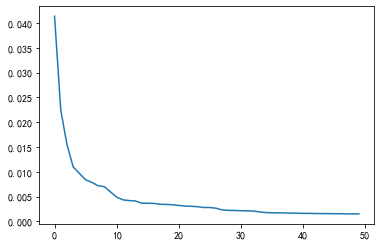

In [209]:
plt.plot(X[:50], occurences_frequency[:50])

### Train word vector

In [101]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [102]:
cores

12

In [210]:
with open('all_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(df['tokenized_content'].tolist()))

In [212]:
model = FastText(LineSentence('all_corpus.txt'), window=5, size=35, iter=10, min_count=1)

D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [100]:
?FastText

In [213]:
model.save('Summarization.model')

D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [105]:
graph = {
            'Yao': ['Guo',
            'Wang',
            'Tian',
            'Tim',
            'BHD',
            'DCC',
            'GII',
            'EEC',
            'CIB',
            'ECB'],
            'Guo': ['Li', 'EAD', 'DAA', 'EII', 'CID', 'FEA'],
            'Wang': ['Li_2', 'IAI', 'DGB', 'AEG', 'ECH', 'CGB'],
            'Li': ['GEH', 'CIF', 'DBD'],
            'Li_2': ['AEB']}

In [106]:
social_network = networkx.graph.Graph()

In [107]:
for vertex, edge in graph.items():
    for v in edge:
        social_network.add_edges_from([(vertex, v)])

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


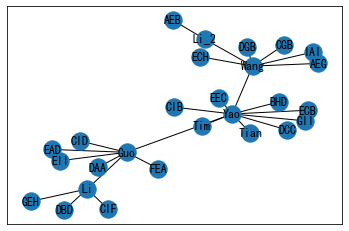

In [108]:
networkx.draw_networkx(social_network)

In [110]:
ranking_result = networkx.pagerank(social_network)

In [111]:
sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.1747698412634544),
 ('Wang', 0.12616099221117885),
 ('Guo', 0.12434209154337311),
 ('Li', 0.07600909782512963),
 ('Li_2', 0.04007465697366682),
 ('AEB', 0.022586982681035123),
 ('GEH', 0.021706946858994478),
 ('CIF', 0.021706946858994478),
 ('DBD', 0.021706946858994478),
 ('IAI', 0.020875426652805028),
 ('DGB', 0.020875426652805028),
 ('AEG', 0.020875426652805028),
 ('ECH', 0.020875426652805028),
 ('CGB', 0.020875426652805028),
 ('EAD', 0.020654738077342236),
 ('DAA', 0.020654738077342236),
 ('EII', 0.020654738077342236),
 ('CID', 0.020654738077342236),
 ('FEA', 0.020654738077342236),
 ('Tian', 0.020410584159305276),
 ('Tim', 0.020410584159305276),
 ('BHD', 0.020410584159305276),
 ('DCC', 0.020410584159305276),
 ('GII', 0.020410584159305276),
 ('EEC', 0.020410584159305276),
 ('CIB', 0.020410584159305276),
 ('ECB', 0.020410584159305276)]

#### Task 2 使用PageRank 对文本进行关联分析

In [116]:
def get_connect_graph_by_text_rank(tokenized_text, window=3):
    keywords_graph = networkx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t)
                      for connect in range(ii - window, ii + window + 1)
                      if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)
        
    return keywords_graph

In [117]:
first_content = df.iloc[1]['tokenized_content']

In [119]:
keywords_graph = get_connect_graph_by_text_rank(first_content, window=5)

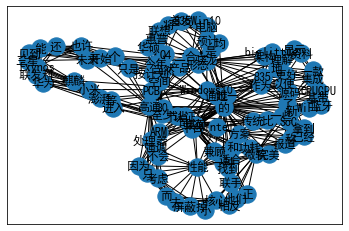

In [121]:
networkx.draw_networkx(keywords_graph)

#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:

In [218]:
#hint('a.53e5.5b50.5411.91cf.80fd.591f.8861.91cf.53e5.5b50.4e4b.95f4.7684.76f8.4f3c.5ea6.ff0c.6545.800c.53ef.4ee5.901a.8fc7.8be5.65b9.6cd5.5224.65ad.67d0.4e2a.53e5.5b50.662f.5426.548c.6587.672c.542b.4e49.76f8.5173.a')

#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

In [480]:
def sentence_embedding(sentence):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-4
    
    global frequency
    
    max_fre = max(frequency.values())
    
    sentence_vec = np.zeros_like(model.wv['测试'])
     
    words = cut_sentence_to_words(sentence)
    words = [w for w in words if w in model.wv]

    for w in words:
        weight = alpha / (alpha + frequency.get(w, max_fre))
        sentence_vec += weight * model.wv[w]
    
    sentence_vec /= len(words)
    
    # Skip the PCA
    return sentence_vec

In [481]:
sentence_embedding(split_sentence(df['content'][0])[0])

array([ 0.3649808 ,  0.13979061,  0.84194344,  0.363532  , -0.53035325,
       -0.7233682 ,  0.04611822, -0.03226246,  0.67258793,  0.17196766,
        0.2617024 ,  0.6023036 ,  0.23560154,  0.5922899 ,  0.40102386,
       -0.5442358 , -0.11515176, -0.19699991,  0.41195402, -0.26182294,
        0.37422746,  0.81174916,  0.30886763, -0.19084352, -0.04166068,
        0.08061183, -0.38324925,  0.1455623 , -0.02084506,  0.13884391,
       -0.24170098,  0.36772013,  0.6822229 ,  0.16970088,  0.11711059],
      dtype=float32)

In [334]:
def sentence_sim(sentence_list):
    sim_mat = np.zeros([len(sentence_list), len(sentence_list)])
    
    for i in range(len(sentence_list)):
        for j in range(len(sentence_list)):
            if i != j:
                sim_mat[i][j] = cosine(sentence_embedding(sentence_list[i]).reshape(1,35), sentence_embedding(sentence_list[j]).reshape(1,35))
    return sim_mat

In [484]:
sentence_list = split_sentence(df['content'][0])

In [485]:
sentence_list

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI 9的研发之中',
 'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了',
 '当然，关于MIUI 9的确切信息，我们还是等待官方消息']

In [486]:
sent_sim = sentence_sim(sentence_list)

In [487]:
nx_graph = networkx.from_numpy_array(sent_sim)

In [488]:
scores = networkx.pagerank(nx_graph)

In [489]:
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentence_list)), reverse=True)

In [490]:
sn = 2
for i in range(sn):
    print("第" + str(i + 1) + "条摘要：\n\n", ranked_sentences[i][1], '\n')

第1条摘要：

 此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作 

第2条摘要：

 MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了 



# Test news

In [494]:
news = '1993年2月的一天，利物浦10岁小男孩罗伯特和乔恩翘了课，在商场闲逛，和很多淘气孩子一样搞破坏，直到两岁的詹姆斯出现。他俩拐走了詹姆斯，并在当天傍晚杀害了这个可怜的幼儿。法医在詹姆斯身上发现残忍虐打的证据，以及42处伤口。两个10岁孩子甚至还把詹姆斯的尸体放在铁轨上，制造事故假象。经过一番波折，罗伯特和乔恩最终被判刑15年，但服刑8年之后，二人就获释了。短片《羁押》高度还原了罗伯特和乔恩当初接受审讯的情景，两个孩子都极力将罪责推给另一个人，罗伯特冷酷镇定，乔恩则试图利用未成年的身份博取同情。这种与年龄不符的冷酷与“心机”，在前几天少年杀害女童的案件中，也能感受得到。10月20日，东北一13岁少年将小区里一个10岁女童骗至家中，残忍杀害后抛尸。媒体披露了嫌疑人在同学群中的聊天截图， 他谈论这起凶案，一面强调自己未成年，一面疑似释放“自己只是路过、不小心留下不利证据”的信号。这样的言辞让人不禁脊背一凉，这是怎样的冷漠与冷血？因为嫌疑人未满14周岁，无法进入刑事司法程序，当地公安机关已依法对其收容教养。这类恶性案件，总会引发“是否应该降低刑事责任年龄”的讨论。女儿被残忍杀害，嫌疑人却没有接受刑罚，这是父母难以承受之重。悲剧发生时，降低刑责年龄几乎是以一种正义解决方案的面目出现的。降低刑事责任年龄，对我国来说是否必要且可行，这在学界和社会各界都已经争论了许久。'

sentences = split_sentence(news)

sent_sim = sentence_sim(sentences)
nx_graph = networkx.from_numpy_array(sent_sim)
scores = networkx.pagerank(nx_graph)
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
sn = 2
for i in range(sn):
    print("第" + str(i + 1) + "条摘要：\n\n", ranked_sentences[i][1], '\n')

第1条摘要：

 因为嫌疑人未满14周岁，无法进入刑事司法程序，当地公安机关已依法对其收容教养 

第2条摘要：

 1993年2月的一天，利物浦10岁小男孩罗伯特和乔恩翘了课，在商场闲逛，和很多淘气孩子一样搞破坏，直到两岁的詹姆斯出现 



In [492]:
sentences

['1993年2月的一天，利物浦10岁小男孩罗伯特和乔恩翘了课，在商场闲逛，和很多淘气孩子一样搞破坏，直到两岁的詹姆斯出现',
 '他俩拐走了詹姆斯，并在当天傍晚杀害了这个可怜的幼儿',
 '法医在詹姆斯身上发现残忍虐打的证据，以及42处伤口',
 '两个10岁孩子甚至还把詹姆斯的尸体放在铁轨上，制造事故假象',
 '经过一番波折，罗伯特和乔恩最终被判刑15年，但服刑8年之后，二人就获释了',
 '短片《羁押》高度还原了罗伯特和乔恩当初接受审讯的情景，两个孩子都极力将罪责推给另一个人，罗伯特冷酷镇定，乔恩则试图利用未成年的身份博取同情',
 '这种与年龄不符的冷酷与“心机”，在前几天少年杀害女童的案件中，也能感受得到',
 '10月20日，东北一13岁少年将小区里一个10岁女童骗至家中，残忍杀害后抛尸',
 '媒体披露了嫌疑人在同学群中的聊天截图， 他谈论这起凶案，一面强调自己未成年，一面疑似释放“自己只是路过、不小心留下不利证据”的信号',
 '这样的言辞让人不禁脊背一凉，这是怎样的冷漠与冷血',
 '因为嫌疑人未满14周岁，无法进入刑事司法程序，当地公安机关已依法对其收容教养',
 '这类恶性案件，总会引发“是否应该降低刑事责任年龄”的讨论',
 '女儿被残忍杀害，嫌疑人却没有接受刑罚，这是父母难以承受之重',
 '悲剧发生时，降低刑责年龄几乎是以一种正义解决方案的面目出现的',
 '降低刑事责任年龄，对我国来说是否必要且可行，这在学界和社会各界都已经争论了许久']

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：

In [217]:
hint('a.63d0.793a.ff1a.9891.7387.ff0c.91cd.8981.6027.ff0c.5feb.901f.ff0c.6027.80fd.597d.a')


提示：频率，重要性，快速，性能好



Q10. embedding是什么？ 用数学的方式解释embedding。

回答：

In [496]:
hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')


提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持



Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：

In [495]:
hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')


例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 



Q12. 这种embedding的方法和tfidf有何异同？ 

回答：

In [497]:
hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')


提示：tfidf考虑的频率其 tf 和 idf 分别是什么？ 该embedding的频率类似于什么？ 



Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答:

In [498]:
hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')


开发型问题，可以省略，可以赋予随机值，可以给一特定值，具体情况需要经过试验进行分析



Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：

In [499]:
hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')


cosine， 余弦距离



Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：

In [500]:
hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')


提示：请参考word2vec训练时候的的概率分布的定义，可以看到其loss当时优化的就是 exp(v1 . v2), 那么当 v1 . v2最大的时候，
就是这两个向量方向一致的时候，所以，该词向量在训练的时候的loss的衡量，就是依据方向进行的。 



In [501]:
hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')


另外，也不是不能用欧几里得，但是依据上一提示之分析，欧几里得是不能很好保持语义相似性的。 



Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：

In [502]:
hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

cosine只考虑“方向“是否一样


#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [503]:
hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')


提示：可以从其分布的密度，分布变化等趋势进行观察。



## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [504]:
hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')


#一个可以的solution是：

L = [1, 2, 3, 4, 10, 1, 2]
window = 3

L = [np.mean(L[i-window:i+window]) for i in range(len(L))]
# 当然，这里的np.mean是一种最简单的平均化方法，我们还可以考虑其他的例如距离加权，等方法



### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

In [505]:
hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')


title = 'some words'
content = 'more and more words'
sentene_vec_title = get_sentence_vec(title)
sentene_vec_content = get_sentence_vec(content)
#对于一个子句 sub_sen_n, 以前的similarity是 cosine(get_sentene_vec(sub_sen_n), sentene_vec_content)
#现在可以是
p = 0.5
sen_vec = get_sentene_vec(sub_sen_n)
similarity = p * cosine(sen_vec, sentene_vec_title) + (1 - p) * cosine(sen_vec, sentene_vec_content)
# 当然，这里的p以及p和cosine的构建都是可以变化的。 p 和 1-p是线性关系，可以是其他的关系。自己定即可



### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。